# News Mood 

### Sentiments Analysis using VADER

* Based on the analysis of the last 100 tweets by major news organizations such as BBC, CBS, CNN, Fox, and NYTimes, it is easy to notice that CBS and BBC provide most of the positive tweets. The bar chart of compound sentiments' averages proves that fact. 


* NYTimes displays an extensive pallet of sentiments, which are evenly distributed on a scale from extremely negative to extremely positive, that makes an average of tweets' sentiments appear very close to neutral.


* Top 3 of most positive tweets - CBS, BBC, and Fox. Top 3 of most negative tweets - NYTimes, Fox, and CNN. Fox shows extreme polarities in their tweets, and that makes their average sentiment score be the most neutral out of all organizations. 




In [1]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [2]:
#Get tweets from each news organization's twitter feeds.

sentiments = []
target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.
for user in target_users:
    
    counter = 0
    
    # Get last 100 tweets from the homefeed of each news organization for total of 500 tweets.
    public_tweets = api.user_timeline(user, count = 100)

    #Loop through all tweets.
    for tweet in public_tweets:

        #Run the Vader analysis on each tweets' sentiments.
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the list.
        sentiments.append({"Source" : user,
                           "Date": tweet["created_at"],
                           "Tweet Text" : tweet_text,
                           "Compound" : compound,
                           "Positive" : pos,
                           "Neutral" : neu,
                           "Negative" : neg,
                           "Tweets Ago" : counter})
        counter = counter + 1

In [3]:
# Convert sentiments to DataFrame
news_sentiments_df = pd.DataFrame(sentiments, columns=["Source",
                                                        "Date",
                                                        "Tweet Text",
                                                        "Compound",
                                                        "Positive",
                                                        "Neutral",
                                                        "Negative",
                                                        "Tweets Ago"])
news_sentiments_df.head()

,Source,Date,Tweet Text,Compound,Positive,Neutral,Negative,Tweets Ago
0,@BBC,Mon Jun 18 20:58:38 +0000 2018,RT @BBCOne: This. Will. Hurt.\n\n@IdrisElba re...,-0.5267,0.000,0.825,0.175,0
1,@BBC,Mon Jun 18 20:02:04 +0000 2018,Monologues inspired by women who have spoken o...,0.7845,0.284,0.661,0.054,1
2,@BBC,Mon Jun 18 18:02:04 +0000 2018,🎧❤️ Casey dreams of one day playing in Ibiza. ...,0.5423,0.310,0.690,0.000,2
3,@BBC,Mon Jun 18 16:16:09 +0000 2018,"Tonight, @GaryLineker introduces live coverage...",0.0000,0.000,1.000,0.000,3
4,@BBC,Mon Jun 18 16:02:03 +0000 2018,✊ @StaceyDooley investigates the changing face...,-0.2263,0.000,0.826,0.174,4


In [4]:
# Count total tweets
news_sentiments_df.count()

Source        500
Date          500
Tweet Text    500
Compound      500
Positive      500
Neutral       500
Negative      500
Tweets Ago    500
dtype: int64

In [5]:
# Save dataset in the csv format
news_sentiments_df.to_csv('News_Mood_Data.csv', index=False)

## Scatter Plot - News Sentiment 

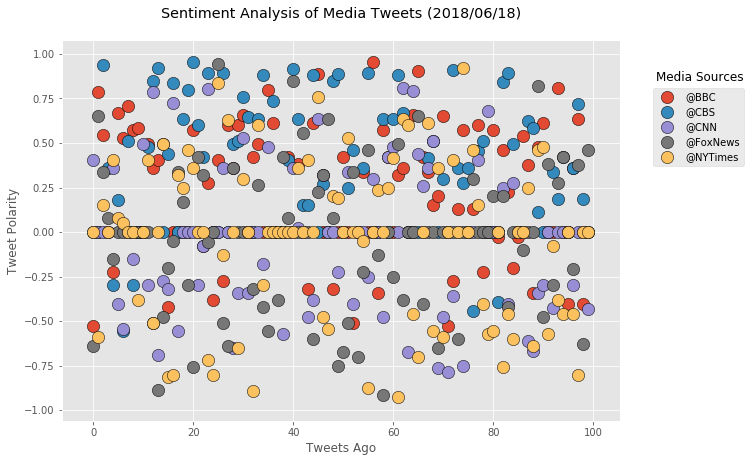

In [6]:
# Build scatter plot of tweets sentiments
plt.figure(figsize=(10,7))

# Loop through the list of target user to display on the plot
for user in target_users:
    dataframe = news_sentiments_df[news_sentiments_df["Source"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"], marker="o", edgecolor="black", s=150, label=user)

now = datetime.now()
now = now.strftime("%Y/%m/%d")
plt.title(f"Sentiment Analysis of Media Tweets ({now})\n")
plt.figtext(.95, .8, "Media Sources", fontsize=12)
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.legend(loc=(1.06,.67))

plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

In [7]:
# Aggregate the compound sentiments analyzed by VADER
average_sentiment = news_sentiments_df.groupby("Source")['Compound'].mean()
average_sentiment

Source
@BBC        0.216308
@CBS        0.331694
@CNN       -0.025918
@FoxNews   -0.033504
@NYTimes   -0.044761
Name: Compound, dtype: float64

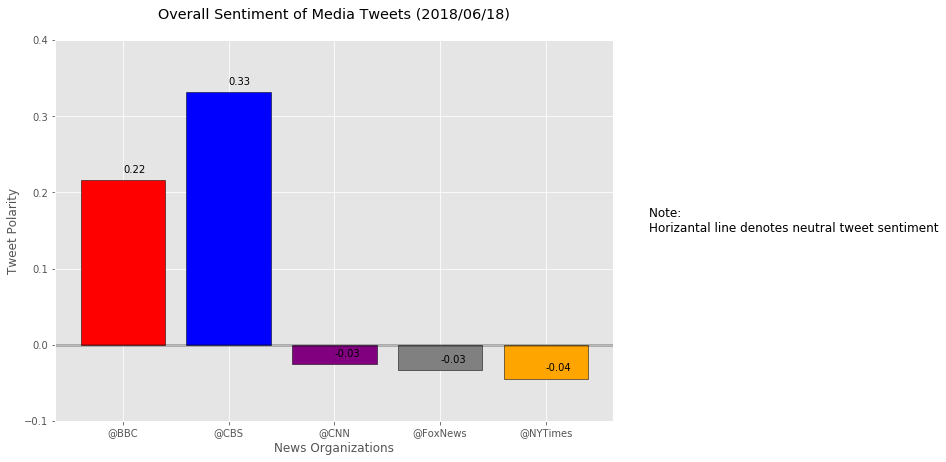

In [10]:
# Build a bar plot to display the average compound sentiment of news organizations
plt.figure(figsize=(10,7))
plt.ylim(-.10, .40)
x_axis = np.arange(len(average_sentiment))
xlabels = average_sentiment.index

# Loop through the list of average sentiments
count = 0
for sentiment in average_sentiment:
    plt.text(count, sentiment+.01, str(round(sentiment,2)))
    count += 1
    
plt.bar(x_axis, average_sentiment, tick_label = xlabels, color = ['r', 'b', 'purple', 'grey', 'orange'], edgecolor='black')
plt.axhline(y=0, linestyle='-', linewidth = 3, color = "black", alpha=.25)
plt.figtext(.95, .5, "Note: \nHorizantal line denotes neutral tweet sentiment", fontsize=12)

now = datetime.now()
now = now.strftime("%Y/%m/%d")
plt.title(f"Overall Sentiment of Media Tweets ({now})\n")
plt.xlabel("News Organizations")
plt.ylabel("Tweet Polarity")

plt.savefig("fig2.png", bbox_inches='tight')
plt.show()